# BACKTEST RMS 

This project imports Trade Log data and breaks it down into required metrics to analyse a stratergy performamnce over a period of time. 

Contents:

- Import Trade Data from CSV.
- Calculating Annual Ratios 
- Max Profit/Drawdown 
- Stratergy Output
- Calculating Moving Averages
- Import Index Data
- Index/Stratergy Return Correlation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import data

In [2]:
df = pd.read_csv('TradeLog.csv')
df.shape

(569, 15)

In [3]:
df.columns

Index(['Index', 'Entry-Date', 'ExitDate', 'Entry-Price', 'ExitPrice',
       'Quantity', 'Instrument-Kind', 'StrikePrice', 'ExpiryDate', 'Position',
       'P/L', 'P/L-Percentage', 'DTD', 'CIM', 'ITD'],
      dtype='object')

In [4]:
df.describe()

,Index,Entry-Price,ExitPrice,Quantity,StrikePrice,P/L,P/L-Percentage,DTD,CIM,ITD
count,568.000000,568.000000,568.000000,568.0,568.000000,568.000000,568.000000,284.000000,2.840000e+02,5.680000e+02
mean,284.500000,74.530106,71.354313,6500.0,38527.112676,20642.649648,4.004080,41285.299296,6.466960e+06,4.644632e+07
std,164.111751,5.692992,28.722122,0.0,3312.538966,186742.701699,37.976309,183849.615295,3.325892e+06,3.326653e+06
min,1.000000,58.750000,0.100000,6500.0,30200.000000,-230425.000000,-42.608173,-156000.000000,-1.036750e+05,3.989632e+07
25%,142.750000,70.300000,51.825000,6500.0,35800.000000,-130000.000000,-26.720107,-130000.000000,4.129450e+06,4.403195e+07
50%,284.500000,74.225000,80.400000,6500.0,38700.000000,0.000000,0.000000,20312.500000,6.744888e+06,4.674180e+07
75%,426.250000,78.662500,93.625000,6500.0,41500.000000,142918.750000,29.909897,186550.000000,9.824994e+06,4.980558e+07
max,568.000000,93.400000,118.650000,6500.0,44300.000000,606125.000000,99.870130,542425.000000,1.185502e+07,5.185502e+07


In [5]:
df.head()

,Index,Entry-Date,ExitDate,Entry-Price,ExitPrice,Quantity,Instrument-Kind,StrikePrice,ExpiryDate,Position,P/L,P/L-Percentage,DTD,CIM,ITD
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,"Monday, 24 January 2022","Monday, 24 January 2022",76.00,34.70,6500.0,CE,38600.0,27/01/22,Sell,268450.0,54.342105,NaN,NaN,40000000.0
2,2.0,"Monday, 24 January 2022","Monday, 24 January 2022",74.40,94.40,6500.0,PE,36500.0,27/01/22,Sell,-130000.0,-26.881720,138450.0,138450.0,40138450.0
3,3.0,"Tuesday, 25 January 2022","Tuesday, 25 January 2022",72.55,92.55,6500.0,CE,37800.0,27/01/22,Sell,-130000.0,-27.567195,NaN,NaN,40138450.0
4,4.0,"Tuesday, 25 January 2022","Tuesday, 25 January 2022",72.95,9.75,6500.0,PE,35000.0,27/01/22,Sell,410800.0,86.634681,280800.0,419250.0,40419250.0


In [6]:
df.tail()

,Index,Entry-Date,ExitDate,Entry-Price,ExitPrice,Quantity,Instrument-Kind,StrikePrice,ExpiryDate,Position,P/L,P/L-Percentage,DTD,CIM,ITD
564,564.0,"Tuesday, 14 March 2023","Tuesday, 14 March 2023",79.30,99.30,6500.0,PE,38700.0,16/03/23,Sell,-130000.0,-25.220681,-130000.0,11612575.0,51612575.0
565,565.0,"Wednesday, 15 March 2023","Wednesday, 15 March 2023",65.95,8.65,6500.0,CE,40400.0,16/03/23,Sell,372450.0,86.884003,NaN,NaN,51612575.0
566,566.0,"Wednesday, 15 March 2023","Wednesday, 15 March 2023",72.70,92.70,6500.0,PE,39400.0,16/03/23,Sell,-130000.0,-27.510316,242450.0,11855025.0,51855025.0
567,567.0,"Thursday, 16 March 2023","Thursday, 16 March 2023",82.30,102.30,6500.0,CE,39200.0,16/03/23,Sell,-130000.0,-24.301337,NaN,NaN,51855025.0
568,568.0,"Thursday, 16 March 2023","Thursday, 16 March 2023",67.30,67.30,6500.0,PE,38600.0,16/03/23,Sell,0.0,0.000000,-130000.0,11725025.0,51725025.0


#### Calculate Annualized Ratios 

In [7]:
df['Returns'] = df['ITD'].pct_change()
df['Cumulative Returns'] = (1 + df['Returns']).cumprod()
annualized_returns = (df['Cumulative Returns'].iloc[-1]) ** (254/len(df)) - 1
annualized_volatility = df['Returns'].std() * np.sqrt(254)
sharpe_ratio = annualized_returns / annualized_volatility

print(f"Annualized Returns: {annualized_returns:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Annualized Returns: 12.16%
Annualized Volatility: 4.60%
Sharpe Ratio: 2.65


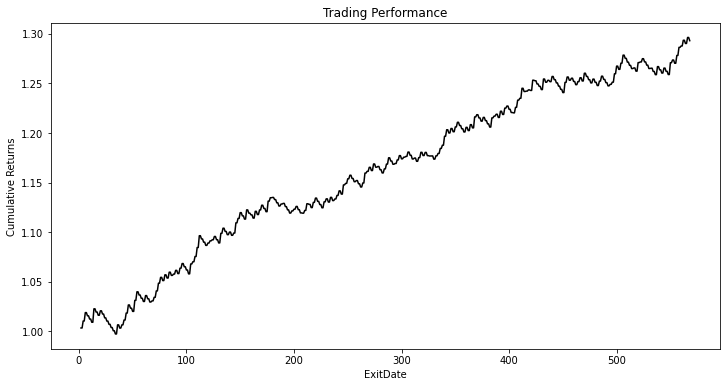

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df['Cumulative Returns'], color='black')
plt.title('Trading Performance')
plt.xlabel('ExitDate')
plt.ylabel('Cumulative Returns')
plt.show()

#### Max Profit/Drawdown

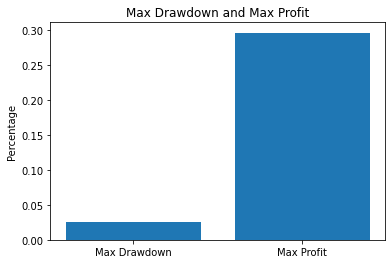

In [9]:
df['Rolling Max'] = df['Cumulative Returns'].cummax()
df['Drawdown'] = df['Cumulative Returns'] / df['Rolling Max'] - 1
max_drawdown = df['Drawdown'].min()
max_profit = df['Cumulative Returns'].max() - 1


plt.bar(['Max Drawdown', 'Max Profit'], [-max_drawdown, max_profit])
plt.ylabel('Percentage')
plt.title('Max Drawdown and Max Profit')
plt.show()

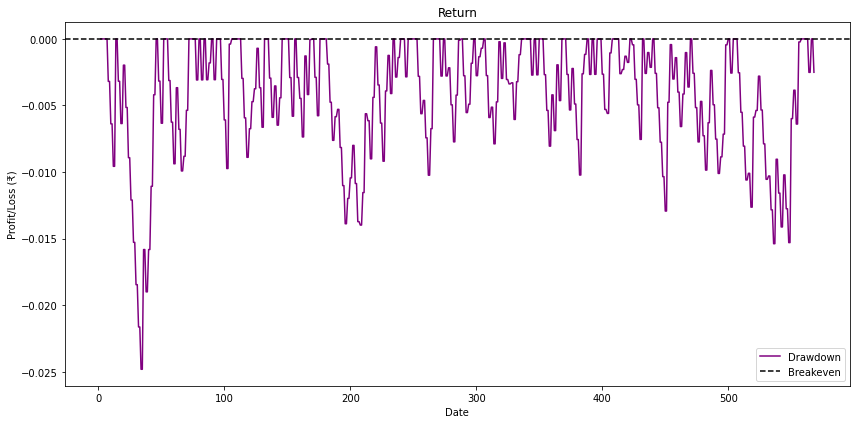

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['Drawdown'], label='Drawdown', color='purple')
ax.axhline(y=0, color='black', label='Breakeven', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Profit/Loss (₹)')
ax.set_title('Return')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

#### Volatility Plot

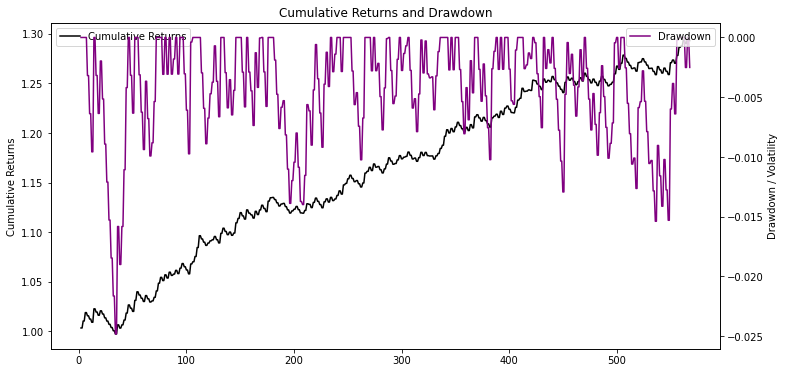

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['Cumulative Returns'], label='Cumulative Returns', color='black')
ax.set_ylabel('Cumulative Returns')
ax2 = ax.twinx()

ax2.plot(df.index, df['Drawdown'], label='Drawdown', color='purple')
ax2.set_ylabel('Drawdown / Volatility')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Cumulative Returns and Drawdown')
plt.show()

#### Stratergy Output

In [12]:
total_days = 284
final_profit = df['P/L'].sum()
total_trades = 284
profitable_trades = len(df[df['DTD'] > 0])
loss_making_trades = len(df[df['DTD'] < 0])

win_rate = round(profitable_trades / total_trades * 100, 2)

avg_profit_per_trade = round(df[df['DTD'] > 0]['DTD'].mean(), 2)
avg_loss_per_trade = round(df[df['DTD'] < 0]['DTD'].mean(), 2)

risk_reward_ratio = abs(avg_profit_per_trade / avg_loss_per_trade)
avg_ror_per_trade = round(df['DTD'].mean(), 2)
max_drawdown = max_drawdown

avg_annualized_returns = annualized_returns

In [13]:
metrics = {
    "Total Days": total_days,
    "Final Profit": final_profit,
    "Total Trades": total_trades,
    "Profitable Trades": profitable_trades,
    "Loss-Making Trades": loss_making_trades,
    "Win Rate": str(win_rate) + '%',
    "Avg Profit per Trade": avg_profit_per_trade,
    "Avg Loss per Trade": avg_loss_per_trade,
    "Avg ROR per trade": avg_ror_per_trade,
    "Max Drawdown": max_drawdown,
    "Avg. Annualized Returns": str(avg_annualized_returns) + '%'
}

report = pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])
print(report)

                                        Value
Total Days                                284
Final Profit                       11725025.0
Total Trades                              284
Profitable Trades                         146
Loss-Making Trades                        138
Win Rate                               51.41%
Avg Profit per Trade                197820.38
Avg Loss per Trade                 -124324.28
Avg ROR per trade                     41285.3
Max Drawdown                        -0.024809
Avg. Annualized Returns  0.12159509808533198%


#### Calculating Moving Averages

In [14]:
df['MA10'] = df['Cumulative Returns'].rolling(10).mean()
df['MA50'] = df['Cumulative Returns'].rolling(50).mean()

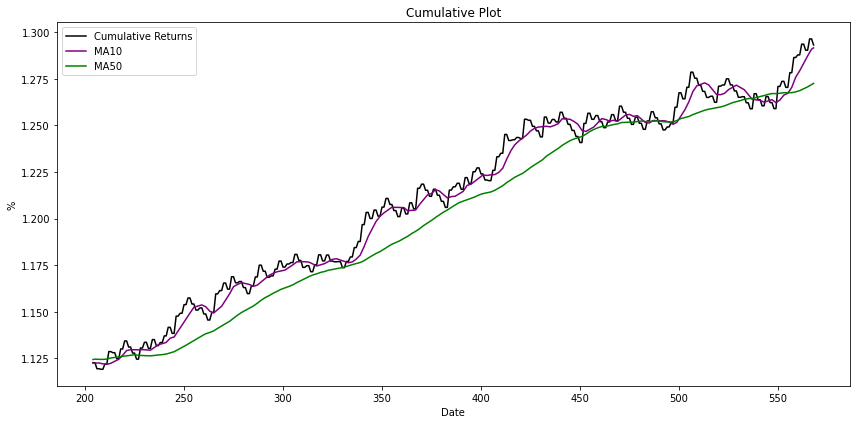

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
df['Cumulative Returns'].tail(365).plot(label='Cumulative Returns', ax=ax, color='black')
df['MA10'].tail(365).plot(label='MA10', ax=ax, color='purple')
df['MA50'].tail(365).plot(label='MA50', ax=ax, color='green')
ax.set_xlabel('Date')
ax.set_ylabel('%')
ax.set_title('Cumulative Plot')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

In [16]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Nifty data from Yahoo Finance
nifty = yf.download('^NSEi', start='2022-01-24', end='2023-03-16')

[*********************100%***********************]  1 of 1 completed


In [17]:
nifty.describe()

,Open,High,Low,Close,Adj Close,Volume
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,17311.099128,17400.972395,17195.531322,17301.291019,17301.291019,279921.126761
std,803.914720,786.269155,811.198735,799.982747,799.982747,80350.778519
min,15272.650391,15382.500000,15183.400391,15293.500000,15293.500000,0.000000
25%,16771.549805,16917.799805,16609.800293,16710.249512,16710.249512,229975.000000
50%,17437.825195,17533.325195,17342.099609,17457.350586,17457.350586,262800.000000
75%,17892.287109,17977.399902,17792.437988,17881.037598,17881.037598,310625.000000
max,18871.949219,18887.599609,18778.199219,18812.500000,18812.500000,651600.000000


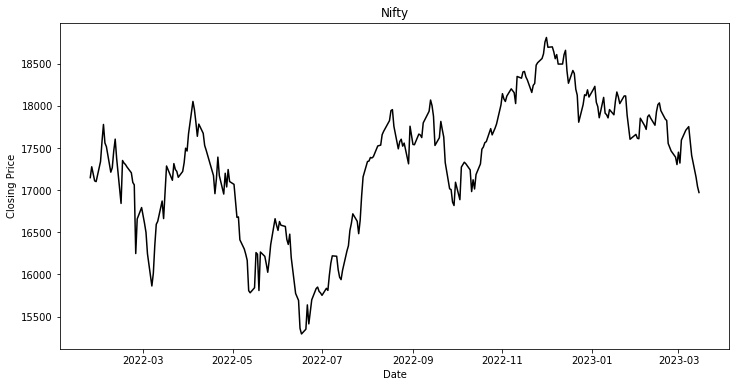

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(nifty['Close'], color='black')
plt.title('Nifty')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

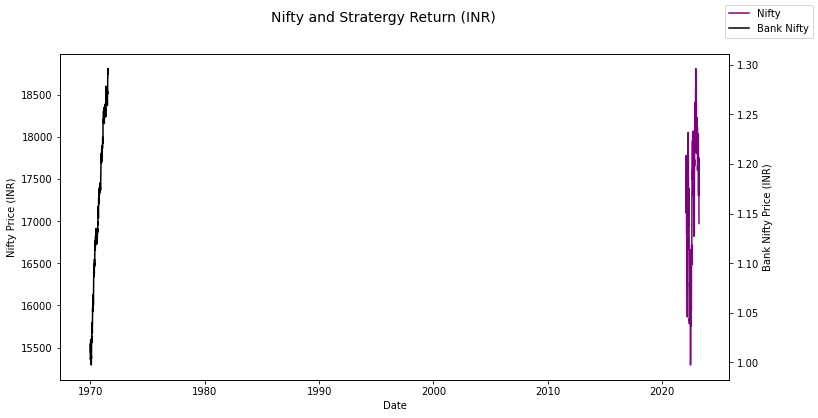

In [28]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(nifty['Adj Close'], label='Nifty', color='purple')
ax1.set_xlabel('Date')
ax1.set_ylabel('Nifty Price (INR)')
ax2 = ax1.twinx()

ax2.plot(df['Cumulative Returns'], color='black', label='Bank Nifty')
ax2.set_ylabel('Bank Nifty Price (INR)')
fig.suptitle('Nifty and Stratergy Return (INR)', fontsize=14)
fig.legend(loc='upper right')

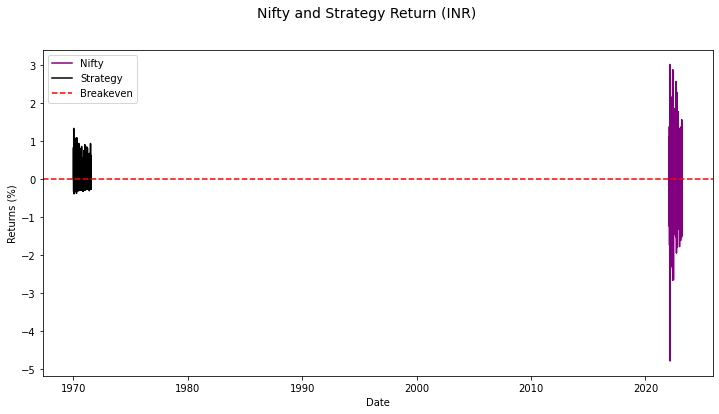

In [29]:
nifty_pct = nifty['Close'].pct_change() * 100
cumulative_pct = df['Cumulative Returns'].pct_change() * 100

# Creating a new figure and setting the title
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('Nifty and Strategy Return (INR)', fontsize=14)

# Plotting both datasets on the same axis
ax.plot(nifty_pct.index, nifty_pct, color='purple', label='Nifty')
ax.plot(cumulative_pct.index, cumulative_pct, color='black', label='Strategy')
ax.axhline(y=0, color='red', label='Breakeven', linestyle='--')

# Setting the y-axis label and legend
ax.set_ylabel('Returns (%)')
ax.legend(loc='upper left')

# Setting the x-axis label
ax.set_xlabel('Date')

# Displaying the chart
plt.show()